In [ ]:
!pip install numpy==1.25.2
!pip install bnlearn

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import bnlearn as bn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from pgmpy.models import BayesianNetwork

import warnings
warnings.filterwarnings("ignore")

In [8]:
train = pd.read_csv('dataset.csv')

train['Passenger ID'] = train.index

# Atau, tambahkan kolom "Passenger ID" dengan nilai unik (misalnya, nomor urut)
train['Passenger ID'] = range(1, len(train) + 1)

cols = list(train.columns)
cols = ['Passenger ID'] + [col for col in cols if col != 'Passenger ID']
train = train[cols]

train.set_index('Passenger ID', inplace=True)

# Tampilkan trainFrame
train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Aktivitas Wisata,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
Passenger ID,,,,,,,,,,,,,,,,,,,,,
1,Tunjungan Plaza,1,1,1,1,1,1,1,1,1,...,"Makan Bersama, Berolahraga, Mengambil Foto, Be...",1,1,0,0,1,1,0,0,1
2,Tunjungan Plaza,1,1,1,1,1,1,1,0,0,...,"Makan Bersama, Mengambil Foto, Beribadah, Berb...",1,0,0,0,1,1,0,0,1
3,Tunjungan Plaza,1,0,1,1,1,1,1,0,0,...,"Makan Bersama, Belajar, Mengambil Foto, Berbel...",1,0,1,0,1,0,0,0,1
4,Tunjungan Plaza,1,1,1,1,0,0,1,1,1,...,"Makan Bersama, Mengambil Foto, Berbelanja",1,0,0,0,1,0,0,0,1
5,Tunjungan Plaza,1,1,1,1,0,1,1,0,0,...,"Makan Bersama, Berolahraga, Mengambil Foto, Be...",1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,Balai Pemuda Alun - Alun Surabaya,1,0,1,1,0,1,1,1,0,...,"Berolahraga, Belajar, Mengambil Foto",0,1,1,0,1,0,0,0,0
1347,Balai Pemuda Alun - Alun Surabaya,1,1,1,1,0,1,1,1,1,...,"Berolahraga, Belajar, Mengambil Foto",0,1,1,0,1,0,0,0,0
1348,Balai Pemuda Alun - Alun Surabaya,1,1,1,0,1,1,1,1,1,...,"Makan, Berolahraga, Belajar, Mengambil Foto, M...",1,1,1,0,1,0,0,1,1


In [9]:
train.describe()

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,...,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,0.893333,0.836296,0.754815,0.860000,0.408148,0.866667,0.585185,0.768889,0.562222,0.585926,...,0.520000,0.497037,0.257037,0.417037,0.059259,0.684444,0.178519,0.027407,0.318519,0.378519
std,0.308803,0.370144,0.430356,0.347116,0.491673,0.340061,0.492873,0.421700,0.496297,0.492744,...,0.499785,0.500177,0.437162,0.493252,0.236197,0.464909,0.383091,0.163328,0.466074,0.485198
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
drop_list = ['Aktivitas Wisata']

train = train.drop(columns=drop_list)



In [11]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 1 to 1350
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Nama Wisata                  1350 non-null   object
 1   Escape                       1350 non-null   int64 
 2   Relaxation                   1350 non-null   int64 
 3   Play                         1350 non-null   int64 
 4   Strenghthening family bonds  1350 non-null   int64 
 5   Prestige                     1350 non-null   int64 
 6   Social Interaction           1350 non-null   int64 
 7   Romance                      1350 non-null   int64 
 8   Educational Opportunity      1350 non-null   int64 
 9   Self-fulfilment              1350 non-null   int64 
 10  Wish-fulfiment               1350 non-null   int64 
 11  Lingkungan                   1350 non-null   int64 
 12  Infrastruktur                1350 non-null   int64 
 13  Fasilitas                    1350

In [12]:
# Data preparing
dfhot_train, dfnum_train = bn.df2onehot(train)



[df2onehot] >Auto detecting dtypes.


100%|██████████| 24/24 [00:00<00:00, 87.58it/s] 


[df2onehot] >Set dtypes in dataframe..


[df2onehot]: 100%|██████████| 24/24 [00:00<00:00, 189.64it/s]

[df2onehot] >Total onehot features: 73


In [13]:
dfnum_train

,Nama Wisata,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,...,Akomodasi,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja
0,27,1,1,1,1,1,1,1,1,1,...,1,1,1,0,0,1,1,0,0,1
1,27,1,1,1,1,1,1,1,0,0,...,1,1,0,0,0,1,1,0,0,1
2,27,1,0,1,1,1,1,1,0,0,...,1,1,0,1,0,1,0,0,0,1
3,27,1,1,1,1,0,0,1,1,1,...,1,1,0,0,0,1,0,0,0,1
4,27,1,1,1,1,0,1,1,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,1,1,0,1,1,0,1,1,1,0,...,0,0,1,1,0,1,0,0,0,0
1346,1,1,1,1,1,0,1,1,1,1,...,0,0,1,1,0,1,0,0,0,0
1347,1,1,1,1,0,1,1,1,1,1,...,0,1,1,1,0,1,0,0,1,1
1348,1,1,1,1,1,0,1,1,1,1,...,0,1,1,0,0,1,0,0,1,1


[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


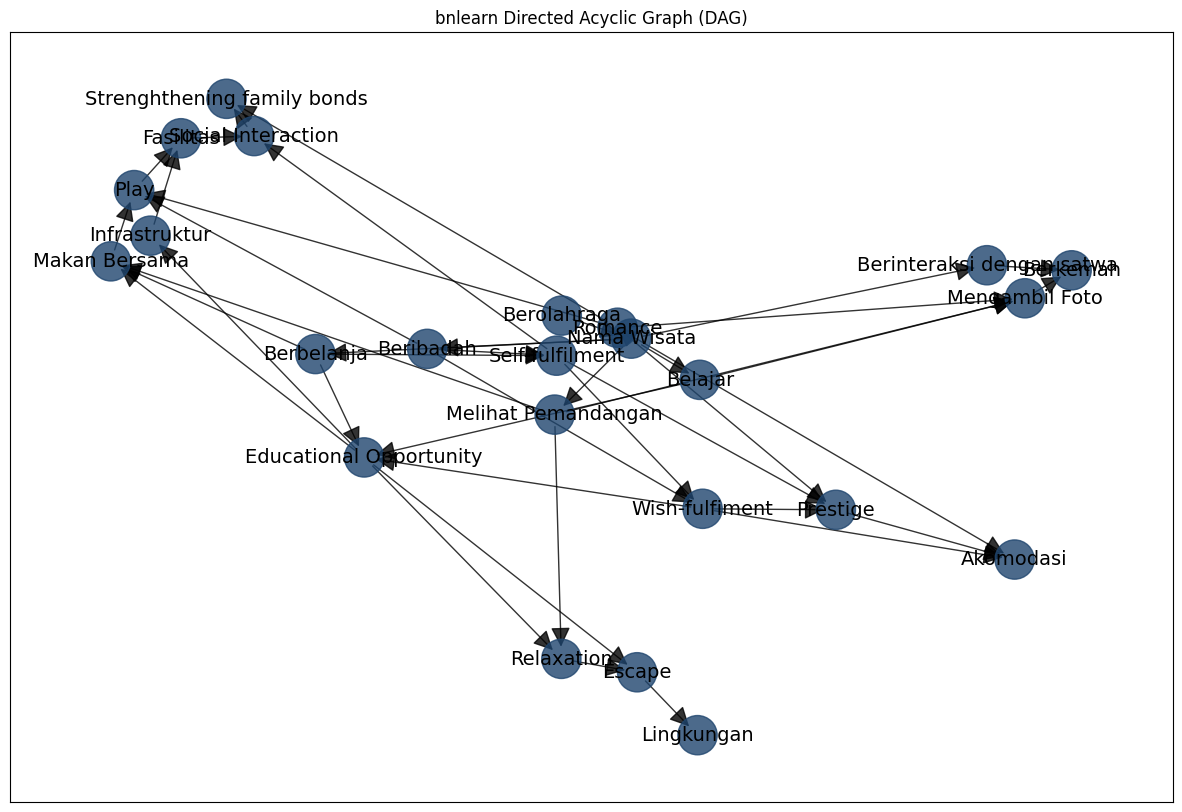

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Nama Wisata:
+-----------------+----------------------+----------------------+
| Berolahraga     | Berolahraga(0)       | Berolahraga(1)       |
+-----------------+----------------------+----------------------+
| Nama Wisata(1)  | 0.017643724895887246 | 0.07145043508679873  |
+-----------------+----------------------+----------------------+
| Nama Wisata(2)  | 0.04159582070427049  | 0.028947483492938044 |
+-----------------+----------------------+----------------------+
| Nama Wisata(3)  | 0.039599812720238554 | 0.03248939612575977  |
+-----------------+----------------------+----------------------+
| Nama Wisata(4)  | 0.03893447672556124  | 0.033670033670033676 |
+-----------------+----------------------+----------------------+
| Nama Wisata(5)  | 0.03826914073088393  | 0.0348

In [14]:

# Structure learning
DAG = bn.structure_learning.fit(dfnum_train, methodtype='hc', root_node='Nama Wisata', bw_list_method='nodes', verbose=3)

# Plot
G = bn.plot(DAG)

# Parameter learning
model = bn.parameter_learning.fit(DAG, dfnum_train, verbose=3)

In [15]:
DAG['adjmat']

# print
print(DAG['adjmat'])

target                       Nama Wisata  Escape  Relaxation   Play  \
source                                                                
Nama Wisata                        False   False       False  False   
Escape                             False   False       False  False   
Relaxation                         False    True       False  False   
Play                               False   False       False  False   
Strenghthening family bonds        False   False       False  False   
Prestige                           False   False       False  False   
Social Interaction                 False   False       False  False   
Romance                            False   False       False   True   
Educational Opportunity            False    True        True  False   
Self-fulfilment                    False   False       False  False   
Wish-fulfiment                     False   False       False  False   
Lingkungan                         False   False       False  False   
Infras

In [16]:
vector = bn.adjmat2vec(DAG['adjmat'])

print(vector)

                       source                       target  weight
0                 Nama Wisata                      Romance    True
1                 Nama Wisata                      Belajar    True
2                 Nama Wisata    Berinteraksi dengan satwa    True
3                 Nama Wisata                    Beribadah    True
4                 Nama Wisata          Melihat Pemandangan    True
5                 Nama Wisata                   Berbelanja    True
6                      Escape                   Lingkungan    True
7                  Relaxation                       Escape    True
8                        Play                    Fasilitas    True
9                    Prestige                    Akomodasi    True
10         Social Interaction  Strenghthening family bonds    True
11                    Romance                         Play    True
12                    Romance  Strenghthening family bonds    True
13                    Romance                     Prestige    

In [17]:

for key, value in model.items():
    if isinstance(value, pd.DataFrame):
        print(f"Key: {key}")
        print(f"Number of features: {value.shape[1]}")
        print(f"Data types:\n{value.dtypes}")
        # check isi dari nama wisata
        print(f"Unique values:\n{value['Nama Wisata'].unique()}")
        

Key: adjmat
Number of features: 24
Data types:
target
Nama Wisata                    bool
Escape                         bool
Relaxation                     bool
Play                           bool
Strenghthening family bonds    bool
Prestige                       bool
Social Interaction             bool
Romance                        bool
Educational Opportunity        bool
Self-fulfilment                bool
Wish-fulfiment                 bool
Lingkungan                     bool
Infrastruktur                  bool
Fasilitas                      bool
Akomodasi                      bool
Makan Bersama                  bool
Berolahraga                    bool
Belajar                        bool
Berinteraksi dengan satwa      bool
Mengambil Foto                 bool
Beribadah                      bool
Berkemah                       bool
Melihat Pemandangan            bool
Berbelanja                     bool
dtype: object
Unique values:
[False  True]


In [25]:
evidence = {
    'Escape': 1,
    'Relaxation': 1,
    'Play': 1,
    'Strenghthening family bonds': 1,
    'Prestige': 1,
    'Social Interaction': 1,
    'Romance': 1,
    'Educational Opportunity': 1,
    'Self-fulfilment': 1,
    'Wish-fulfiment': 1,
    'Lingkungan': 1,
    'Infrastruktur': 1,
    'Fasilitas': 1,
    'Akomodasi': 1,
    'Makan Bersama': 0,
    'Berolahraga': 0,
    'Belajar':1,
    'Berinteraksi dengan satwa': 0,
    'Mengambil Foto': 1,
    'Beribadah': 0,
    'Berkemah': 0,
    'Melihat Pemandangan': 0,
    'Berbelanja': 0
}

In [28]:
evidence

{'Escape': 1,
 'Relaxation': 1,
 'Play': 1,
 'Strenghthening family bonds': 1,
 'Prestige': 1,
 'Social Interaction': 1,
 'Romance': 1,
 'Educational Opportunity': 1,
 'Self-fulfilment': 1,
 'Wish-fulfiment': 1,
 'Lingkungan': 1,
 'Infrastruktur': 1,
 'Fasilitas': 1,
 'Akomodasi': 1,
 'Makan Bersama': 0,
 'Berolahraga': 0,
 'Belajar': 1,
 'Berinteraksi dengan satwa': 0,
 'Mengambil Foto': 1,
 'Beribadah': 0,
 'Berkemah': 0,
 'Melihat Pemandangan': 0,
 'Berbelanja': 0}

In [26]:
query = bn.inference.fit(model, variables=['Nama Wisata'], evidence=evidence, verbose=3)
    # uurutkan dari nilai probabilitas terbesar
query.df

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------------+------------+
|    |   Nama Wisata |          p |
+====+===============+============+
|  0 |             1 | 0.0387596  |
+----+---------------+------------+
|  1 |             2 | 0.0182309  |
+----+---------------+------------+
|  2 |             3 | 0.0445294  |
+----+---------------+------------+
|  3 |             4 | 0.0355131  |
+----+---------------+------------+
|  4 |             5 | 0.0356888  |
+----+---------------+------------+
|  5 |             6 | 0.0427452  |
+----+---------------+------------+
|  6 |             7 | 0.0296208  |
+----+---------------+------------+
|  7 |             8 | 0.0198186  |
+----+---------------+------------+
|  8 |             9 | 0.0148067  |
+----+---------------+------------+
|  9 |            10 | 0.0221593  |
+----+---------------+------------+
| 10 |            11 | 0.0185375  |


,Nama Wisata,p
0,1,0.038760
1,2,0.018231
2,3,0.044529
3,4,0.035513
4,5,0.035689
5,6,0.042745
6,7,0.029621
7,8,0.019819
8,9,0.014807
9,10,0.022159


In [20]:
# Looping baris evidence dan lakukan inference 
for i in range(len(evidence)):
    # kasih label
    print('Evidence ke-', i+1)
    query = bn.inference.fit(model, variables=['Nama Wisata'], evidence=evidence.iloc[i, :], verbose=3)
    print(query.df)
    # uurutkan dari nilai probabilitas terbesar
    print(query.df.sort_values(by='p', ascending=False).head(1))


# query = bn.inference.fit(model, variables=['Nama Wisata'], evidence=evidence, verbose=3)
# query.df


Evidence ke- 1


AttributeError: 'dict' object has no attribute 'iloc'

In [27]:
# change Nama Wisata dari angka ke nama


query.df['Nama Wisata'] = {
    0: "Balai Pemuda Alun - Alun Surabaya",
    1: "Galaxy Mall Surabaya",
    2: "House of Sampoerna",
    3: "Jalan Tunjungan",
    4: "Jatim International Expo (JIE) Convention Exhibiton",
    5: "Kampung Lawas Maspati",
    6: "Kampung Pecinaan Kapasan Dalam",
    7: "Kebun Binatang Surabaya",
    8: "Kebun Raya Mangrove Gunung Anyar",
    9: "Kodam Street Food Surabaya",
    10: "Kuliner Pecinan Kembang Jepun",
    11: "Makam Sunan Ampel",
    12: "Masjid Cheng Ho",
    13: "Masjid Nasional Al Akbar",
    14: "Mirota Batik & Handicraft",
    15: "Monumen Tugu Pahlawan",
    16: "Monumen Kapal Selam",
    17: "Museum Pendidikan Surabaya",
    18: "Museum Surabaya Gedung Siola",
    19: "Pasar Genteng",
    20: "Pasar Pabean",
    21: "Pusat Olahraga KONI",
    22: "Stadion Gelora Bung Tomo",
    23: "Surabaya Convention Center",
    24: "Taman Bungkul",
    25: "Taman Suroboyo",
    26: "Tunjungan Plaza"
}

query.df = query.df.sort_values(by='p', ascending=False)
query.df

,Nama Wisata,p
17,Museum Pendidikan Surabaya,0.118174
18,Museum Surabaya Gedung Siola,0.099426
23,Surabaya Convention Center,0.081759
15,Monumen Tugu Pahlawan,0.076002
14,Mirota Batik & Handicraft,0.062650
25,Taman Suroboyo,0.047937
2,House of Sampoerna,0.044529
5,Kampung Lawas Maspati,0.042745
26,Tunjungan Plaza,0.040563
0,Balai Pemuda Alun - Alun Surabaya,0.038760


In [ ]:
valid

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Nama Wisata
841,1,1,1,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,11
184,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,1,0,24
526,1,1,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,16
1283,1,1,1,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,2
980,1,1,0,1,1,0,1,1,1,0,...,1,0,0,1,1,0,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1,1,0,1,0,1,0,1,1,1,...,0,0,1,0,1,0,0,0,0,3
1320,1,1,1,1,0,1,1,1,1,0,...,1,1,0,0,0,0,0,0,0,1
1076,1,1,1,1,0,1,1,1,0,0,...,1,0,1,0,1,0,0,1,1,6
906,1,1,1,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,9


In [ ]:
valid

,Escape,Relaxation,Play,Strenghthening family bonds,Prestige,Social Interaction,Romance,Educational Opportunity,Self-fulfilment,Wish-fulfiment,...,Makan Bersama,Berolahraga,Belajar,Berinteraksi dengan satwa,Mengambil Foto,Beribadah,Berkemah,Melihat Pemandangan,Berbelanja,Nama Wisata
841,1,1,1,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,1,0,11
184,1,1,1,1,1,1,1,1,1,1,...,1,0,0,0,1,0,0,1,0,24
526,1,1,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,16
1283,1,1,1,1,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,2
980,1,1,0,1,1,0,1,1,1,0,...,1,0,0,1,1,0,0,1,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1,1,0,1,0,1,0,1,1,1,...,0,0,1,0,1,0,0,0,0,3
1320,1,1,1,1,0,1,1,1,1,0,...,1,1,0,0,0,0,0,0,0,1
1076,1,1,1,1,0,1,1,1,0,0,...,1,0,1,0,1,0,0,1,1,6
906,1,1,1,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,9


In [ ]:
y_pred = bn.predict(model, valid, "Nama Wisata", verbose=27)
print(y_pred)

[bnlearn]> Remaining columns for inference: 23


  0%|          | 0/254 [00:00<?, ?it/s]

+-----------------+--------------------+
| Nama Wisata     |   phi(Nama Wisata) |
+=================+====================+
| Nama Wisata(1)  |             0.0137 |
+-----------------+--------------------+
| Nama Wisata(2)  |             0.0221 |
+-----------------+--------------------+
| Nama Wisata(3)  |             0.0486 |
+-----------------+--------------------+
| Nama Wisata(4)  |             0.0403 |
+-----------------+--------------------+
| Nama Wisata(5)  |             0.0348 |
+-----------------+--------------------+
| Nama Wisata(6)  |             0.0360 |
+-----------------+--------------------+
| Nama Wisata(7)  |             0.0754 |
+-----------------+--------------------+
| Nama Wisata(8)  |             0.1311 |
+-----------------+--------------------+
| Nama Wisata(9)  |             0.1245 |
+-----------------+--------------------+
| Nama Wisata(10) |             0.0552 |
+-----------------+--------------------+
| Nama Wisata(11) |             0.0405 |
+---------------

IndexError: index 7 is out of bounds for axis 0 with size 2

In [ ]:
y_pred['Nama Wisata'] = valid['Nama Wisata'].values

In [ ]:
# Get score of the model1
acc = accuracy_score(valid['Nama Wisata'], y_pred['Nama Wisata'])

print('Accuracy -', acc)

Accuracy - 1.0
